## Imports

In [1]:
import scipy.io as sio
import numpy as np
import sklearn
import matplotlib.image as mpimg
from skimage.io import imread
from matplotlib import pyplot as plt
%matplotlib inline

## Load the Data [Images]

In [14]:
im_man = imread('face.jpg') # Image 1: MAN
im_sky = imread('sky.jpg') # Image 2: SKY

## Low-Rank Approximation

In [9]:
def plot(im, img, k=0, image=False, ylabel='', xlabel='', axis=False):
    if image:
        fig = plt.figure()
        a=fig.add_subplot(1,2,1)
        imgplot = plt.imshow(im,cmap='gray')
        a.set_title('Before')
        a=fig.add_subplot(1,2,2)
        imgplot = plt.imshow(img, cmap='gray')
        a.set_title("After [k = "+str(k)+"]")
    else:
        plt.plot(im, img, 'ro')
        if type(axis) != bool:
            plt.axis(axis)
        plt.ylabel(ylabel)
        plt.xlabel(xlabel)
        plt.show()

def k_apps(M, k):
    U, s, V = np.linalg.svd(M) 
    S = np.zeros((len(U), len(s)))
    S[:k, :k] = np.diag(s[:k])
    return np.dot(U, np.dot(S, V))

def F_1():
    for i in [5,20,100]:
        k=i
        plot(im_man, k_apps(im_man,k), k=k, image=True)

def F_2():
    errs = []
    x = []
    for i in range(100+1):
        errs.append(np.linalg.norm(im_man - k_apps(im_man,i+1)))
        x.append(i+1)
    plot(x, errs, ylabel="SUM-SQUARED-ERR", xlabel="k-Rank")#, axis=[0,])

def F_3():
    for i in [5,20,100]:
        k=i
        plot(im_sky, k_apps(im_sky,k), k=k, image=True)
        
def plot_errors_sky():
    errs = []
    x = []
    for i in range(100+1):
        errs.append(np.linalg.norm(im_sky - k_apps(im_sky,i+1)))
        x.append(i+1)
    plot(x, errs, ylabel="SUM-SQUARED-ERR", xlabel="k-Rank")#, axis=[0,])

## Visualizing

### Image 1: Man

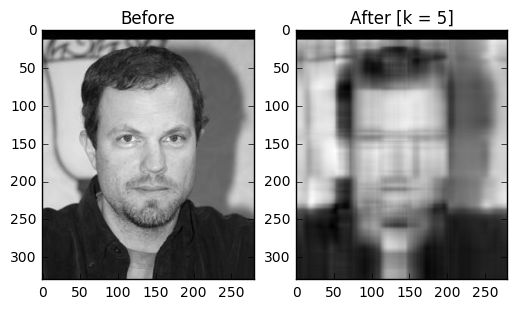

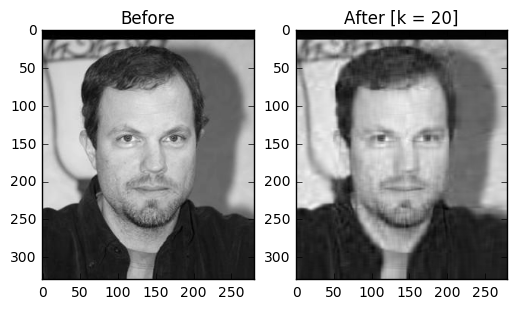

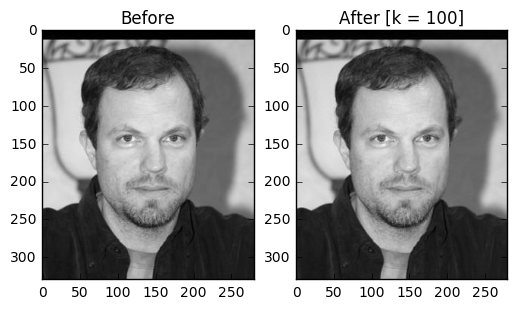

In [10]:
F_1()

### Error:

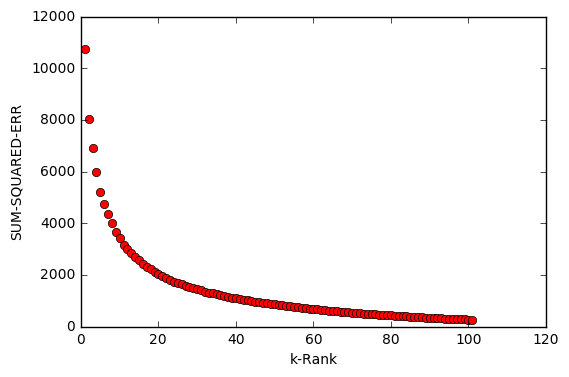

In [11]:
F_2()

### Image 2: Sky

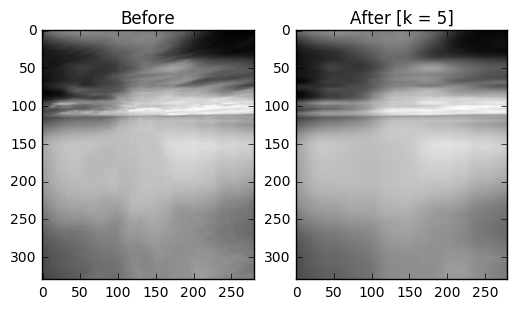

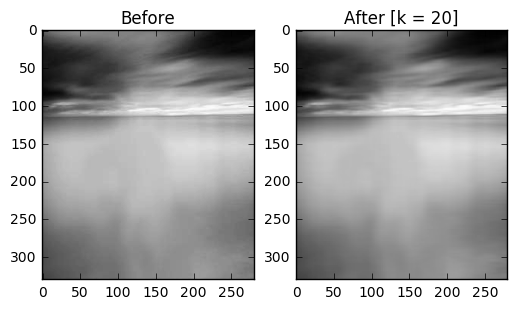

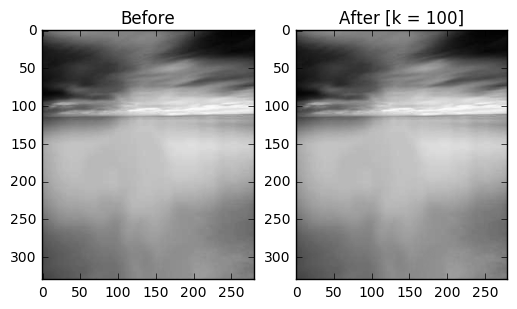

In [12]:
F_3()

### Error:

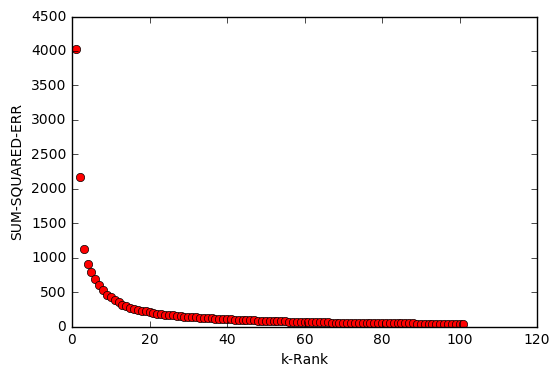

In [13]:
plot_errors_sky()

## Insight